In [49]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

## LOAD

In [2]:
df = pd.read_csv('ecommerce_dataset_us.csv', sep='\t')
# The dataset contains the transaction history of an online store that sells household goods.

## OVERVIEW

In [3]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


In [5]:
df['StockCode'].nunique()

4070

In [6]:
df['InvoiceNo'].nunique()

25900

In [7]:
df['CustomerID'].nunique()

4372

In [8]:
# can I build groups of goods?
print(df['Description'].unique())

['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']


In [9]:
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
150589,549451,22090,PAPER BUNTING RETROSPOT,6,04/06/2019 14:14,2.95,16556.0
106551,545333,22494,EMERGENCY FIRST AID TIN,3,02/27/2019 16:22,2.46,NaN
76396,542624,84559b,3D SHEET OF CAT STICKERS,1,01/29/2019 09:48,1.66,NaN
189295,553146,23134,LARGE ZINC HEART WALL ORGANISER,2,05/11/2019 13:52,8.25,14873.0
181372,552467,22112,CHOCOLATE HOT WATER BOTTLE,6,05/07/2019 15:29,4.95,15249.0
184867,552711,47566,PARTY BUNTING,4,05/09/2019 08:32,4.95,16143.0
177880,552187,23209,mailout,100,05/04/2019 13:59,0.00,NaN
131871,547650,22499,WOODEN UNION JACK BUNTING,3,03/22/2019 12:08,5.95,17059.0
327182,565618,10080,GROOVY CACTUS INFLATABLE,12,09/03/2019 15:40,0.39,15974.0
405777,571716,23169,CLASSIC GLASS COOKIE JAR,2,10/16/2019 17:05,8.29,NaN


In [10]:
df_minus_quantity = df[df['Quantity'] < 0]

In [11]:
# either cancellations or booking fees
df_minus_quantity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10624 entries, 141 to 541717
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    10624 non-null  object 
 1   StockCode    10624 non-null  object 
 2   Description  9762 non-null   object 
 3   Quantity     10624 non-null  int64  
 4   InvoiceDate  10624 non-null  object 
 5   UnitPrice    10624 non-null  float64
 6   CustomerID   8905 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 664.0+ KB


In [12]:
df_minus_quantity.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
410570,C572111,22138,BAKING SET 9 PIECE RETROSPOT,-1,10/18/2019 19:13,4.95,13136.0
293816,C562620,22798,ANTIQUE GLASS DRESSING TABLE POT,-1,08/06/2019 12:34,2.95,13089.0
267600,C560330,22981,PANTRY APPLE CORER,-1,07/16/2019 11:10,1.45,17841.0
270091,C560540,22546,MINI JIGSAW PURDEY,-1,07/17/2019 12:26,0.42,12415.0
185149,552763,21137,NaN,-25,05/09/2019 11:33,0.00,NaN
423489,C573148,23462,ROCOCO WALL MIRROR WHITE,-1,10/25/2019 19:16,19.95,15469.0
313425,C564493,22364,GLASS JAR DIGESTIVE BISCUITS,-4,08/23/2019 14:19,2.95,13089.0
382827,C569964,23032,DRAWER KNOB CRACKLE GLAZE IVORY,-1,10/04/2019 18:46,1.65,16523.0
331034,C565962,22665,RECIPE BOX BLUE SKETCHBOOK DESIGN,-1,09/06/2019 11:25,2.95,14410.0
12069,537363,84569B,NaN,-20,12/04/2018 12:35,0.00,NaN


In [13]:
df_minus_nan = df_minus_quantity[df_minus_quantity['Description'].isna()]

In [14]:
df_minus_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 862 entries, 2406 to 535322
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    862 non-null    object 
 1   StockCode    862 non-null    object 
 2   Description  0 non-null      object 
 3   Quantity     862 non-null    int64  
 4   InvoiceDate  862 non-null    object 
 5   UnitPrice    862 non-null    float64
 6   CustomerID   0 non-null      float64
dtypes: float64(2), int64(1), object(4)
memory usage: 53.9+ KB


In [15]:
df_minus_nan.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
172872,551573,22726,NaN,-5,05/01/2019 11:15,0.0,NaN
45150,540252,22198,NaN,-100,01/03/2019 16:25,0.0,NaN
221877,556287,16043,NaN,-45,06/08/2019 09:22,0.0,NaN
374540,569380,21809,NaN,-140,10/01/2019 16:40,0.0,NaN
150148,549330,84251J,NaN,-28,04/06/2019 10:53,0.0,NaN


## CLEANING

- cleaning 1: missing 'Description' / other rows with same 'InvoiceNo' have an Description - copy from them
- cleaning 2: 'StockCode' not all letters uppercase / set uppercase
- cleaning 3: 'StockCode' isn't an article / drop these rows
- cleaning 4: 'Description' filter lowercase (e.g. smashed) and drop
- cleaning 5: check for double values
- cleaning 6: set correct date type - 'InvoiceDate' datetime, 'CustomerID' int & set 'CustomerID'-NaN to 0


- CREATE REVENUE COLUMN

### cleaning 1: missing 'Description'

In [16]:
df[df['StockCode'] == '20892'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 15095 to 75224
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    6 non-null      object 
 1   StockCode    6 non-null      object 
 2   Description  3 non-null      object 
 3   Quantity     6 non-null      int64  
 4   InvoiceDate  6 non-null      object 
 5   UnitPrice    6 non-null      float64
 6   CustomerID   1 non-null      float64
dtypes: float64(2), int64(1), object(4)
memory usage: 384.0+ bytes


In [17]:
# makes an dictionary with all stock codes as key and descriptions as value,
# replace NaN-'Description' with values from dictionary
df_non_null = df[['StockCode', 'Description']].dropna()
description_dict = dict(zip(df_non_null.StockCode, df_non_null.Description))
count = 0
count_n = 0

for index, row in df.iterrows():
    value = row['Description']
    if pd.isnull(value):
        try:
            df.at[index, 'Description'] = description_dict[row['StockCode']]
            count += 1
        except:
            count_n += 1
        
print(count, ' Descriptions set')
print(count_n, ' can not set')

1342  Descriptions set
112  can not set


In [18]:
df[df['StockCode'] == '20892'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 15095 to 75224
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    6 non-null      object 
 1   StockCode    6 non-null      object 
 2   Description  6 non-null      object 
 3   Quantity     6 non-null      int64  
 4   InvoiceDate  6 non-null      object 
 5   UnitPrice    6 non-null      float64
 6   CustomerID   1 non-null      float64
dtypes: float64(2), int64(1), object(4)
memory usage: 384.0+ bytes


### cleaning 2: 'StockCode' not all letters uppercase / set uppercase

In [19]:
df['StockCode'] = df['StockCode'].str.upper()

### cleaning 3: 'StockCode' isn't an article / drop these rows

In [20]:
# StockCode == more than 3 Letters
df_no_article = df[df['StockCode'].str.contains(pat='[A-Za-z]{3,}', regex=True)]

In [21]:
df_no_article['StockCode'].unique()

array(['POST', 'DOT', 'BANK CHARGES', 'AMAZONFEE', 'DCGS0076', 'DCGS0003',
       'GIFT_0001_40', 'DCGS0070', 'GIFT_0001_50', 'GIFT_0001_30',
       'GIFT_0001_20', 'DCGS0055', 'DCGS0072', 'DCGS0074', 'DCGS0069',
       'DCGS0057', 'DCGSSBOY', 'DCGSSGIRL', 'GIFT_0001_10', 'PADS',
       'DCGS0004', 'DCGS0073', 'DCGS0071', 'DCGS0068', 'DCGS0067',
       'DCGS0066P', 'CRUK'], dtype=object)

In [22]:
# drop no_article - create new dfc (Data Frame Clear)
dfc = df.drop(df_no_article.index)

In [23]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539773 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    539773 non-null  object 
 1   StockCode    539773 non-null  object 
 2   Description  539667 non-null  object 
 3   Quantity     539773 non-null  int64  
 4   InvoiceDate  539773 non-null  object 
 5   UnitPrice    539773 non-null  float64
 6   CustomerID   405585 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 32.9+ MB


In [24]:
# drop 'UnitPrice' and 'Description' == Null
df_stock_price_null = dfc.loc[(dfc['UnitPrice'] == 0) & (df['Description'].isnull())]
dfc = dfc.drop(df_stock_price_null.index)

In [25]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539667 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    539667 non-null  object 
 1   StockCode    539667 non-null  object 
 2   Description  539667 non-null  object 
 3   Quantity     539667 non-null  int64  
 4   InvoiceDate  539667 non-null  object 
 5   UnitPrice    539667 non-null  float64
 6   CustomerID   405585 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 32.9+ MB


In [26]:
# drop 'StockCode' M (Manual), D (Discount) ???

### cleaning 4: 'Description' filter lowercase (e.g. smashed, missing) and drop

In [27]:
dfc_desc_lower = dfc[dfc['Description'].str.contains(pat='[a-z]{3,}', regex=True)]

In [28]:
dfc_desc_lower = dfc_desc_lower[dfc_desc_lower['UnitPrice'] <= 0]

In [29]:
dfc_desc_lower.tail(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
535336,581213,22576,check,-30,12/05/2019 18:38,0.0,NaN
536908,581226,23090,missing,-338,12/06/2019 09:56,0.0,NaN
538919,581422,23169,smashed,-235,12/06/2019 15:24,0.0,NaN


In [30]:
dfc = dfc.drop(dfc_desc_lower.index)

In [31]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539042 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    539042 non-null  object 
 1   StockCode    539042 non-null  object 
 2   Description  539042 non-null  object 
 3   Quantity     539042 non-null  int64  
 4   InvoiceDate  539042 non-null  object 
 5   UnitPrice    539042 non-null  float64
 6   CustomerID   405579 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 32.9+ MB


### cleaning 5: check for double values

In [32]:
#dfc[dfc.duplicated(subset=['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID'])]

### cleaning 6: set correct date type - 'InvoiceDate' datetime, 'CustomerID' int

In [33]:
dfc['InvoiceDate'] = df['InvoiceDate'].astype('datetime64[ns]')
dfc['CustomerID'] = dfc['CustomerID'].fillna(0)
dfc['CustomerID'] = dfc['CustomerID'].astype('int64')

### Create Revenue Column

In [34]:
dfc['Revenue'] = dfc['Quantity'] * dfc['UnitPrice']

In [35]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539042 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    539042 non-null  object        
 1   StockCode    539042 non-null  object        
 2   Description  539042 non-null  object        
 3   Quantity     539042 non-null  int64         
 4   InvoiceDate  539042 non-null  datetime64[ns]
 5   UnitPrice    539042 non-null  float64       
 6   CustomerID   539042 non-null  int64         
 7   Revenue      539042 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 37.0+ MB


In [36]:
first = dfc['InvoiceDate'].min()
last = dfc['InvoiceDate'].max()
last - first

Timedelta('373 days 04:24:00')

In [37]:
dfc.describe()

,Quantity,UnitPrice,CustomerID,Revenue
count,539042.000000,539042.000000,539042.000000,539042.000000
mean,9.833416,3.715820,11507.963572,18.055998
std,216.642889,61.060588,6766.135438,372.231465
min,-80995.000000,0.000000,0.000000,-168469.600000
25%,1.000000,1.250000,12362.000000,3.400000
50%,3.000000,2.080000,14397.000000,9.480000
75%,10.000000,4.130000,16266.000000,17.400000
max,80995.000000,38970.000000,18287.000000,168469.600000


In [38]:
dfc.sample(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Revenue
303998,563557,22670,FRENCH WC SIGN BLUE METAL,12,2019-08-15 13:33:00,1.25,15786,15.00
492173,578093,22776,SWEETHEART 3 TIER CAKE STAND,1,2019-11-20 17:21:00,9.95,14911,9.95
17169,537688,21326,AGED GLASS SILVER T-LIGHT HOLDER,24,2018-12-06 10:35:00,0.65,17406,15.60
270270,560555,20984,12 PENCILS TALL TUBE POSY,2,2019-07-17 13:01:00,0.29,14178,0.58
294688,562717,22382,LUNCH BAG SPACEBOY DESIGN,1,2019-08-06 15:42:00,4.13,0,4.13
227699,556903,21621,VINTAGE UNION JACK BUNTING,2,2019-06-13 12:55:00,8.50,14527,17.00
329889,565857,23061,VINTAGE EMBOSSED HEART,12,2019-09-05 14:13:00,1.25,14911,15.00
109208,545588,21668,RED STRIPE CERAMIC DRAWER KNOB,12,2019-03-02 10:03:00,1.25,13382,15.00
133911,547805,82583,HOT BATHS METAL SIGN,12,2019-03-23 13:35:00,2.10,13327,25.20
216731,555853,37489B,BLUE/YELLOW FLOWER DESIGN BIG MUG,1,2019-06-05 13:44:00,0.39,14375,0.39


## Save Cleaned Data Frame

In [39]:
dfc.to_csv('ecommerce_dataset_us_clean.csv', sep='\t')

In [40]:
dfc[dfc['Revenue'] == dfc['Revenue'].max()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Revenue
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2019-12-07 09:15:00,2.08,16446,168469.6


In [41]:
dfc[dfc['Revenue'] == dfc['Revenue'].min()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Revenue
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2019-12-07 09:27:00,2.08,16446,-168469.6


In [42]:
dfc_cancel = dfc[dfc['InvoiceNo'].str.startswith('C')]

In [43]:
dfc_cancel.describe()

,Quantity,UnitPrice,CustomerID,Revenue
count,9088.000000,9088.000000,9088.000000,9088.000000
mean,-30.518596,20.634367,14509.761224,-69.804390
std,1158.319372,435.409402,3146.030812,1997.730756
min,-80995.000000,0.010000,0.000000,-168469.600000
25%,-6.000000,1.450000,13319.000000,-17.000000
50%,-2.000000,2.950000,14767.000000,-8.500000
75%,-1.000000,4.950000,16321.000000,-3.400000
max,-1.000000,38970.000000,18282.000000,-0.120000


In [44]:
dfc[dfc['InvoiceNo'] == '536365']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850,15.30
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2018-11-29 08:26:00,7.65,17850,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2018-11-29 08:26:00,4.25,17850,25.50


In [45]:
# group by InvoiceNo - count Article in Invoice
df_invoice = dfc.groupby(['InvoiceNo']).agg({'Revenue': 'sum', 'CustomerID': 'count'})
# rename columns
df_invoice.rename(columns={'CustomerID': 'Article count'}, inplace=True)

In [46]:
df_invoice.head()

,Revenue,Article count
InvoiceNo,,
536365,139.12,7
536366,22.20,2
536367,278.73,12
536368,70.05,4
536369,17.85,1


In [50]:
dfc[dfc['InvoiceNo'] == '536368']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Revenue
21,536368,22960,JAM MAKING SET WITH JARS,6,2018-11-29 08:34:00,4.25,13047,25.50
22,536368,22913,RED COAT RACK PARIS FASHION,3,2018-11-29 08:34:00,4.95,13047,14.85
23,536368,22912,YELLOW COAT RACK PARIS FASHION,3,2018-11-29 08:34:00,4.95,13047,14.85
24,536368,22914,BLUE COAT RACK PARIS FASHION,3,2018-11-29 08:34:00,4.95,13047,14.85


(0.0, 250.0)

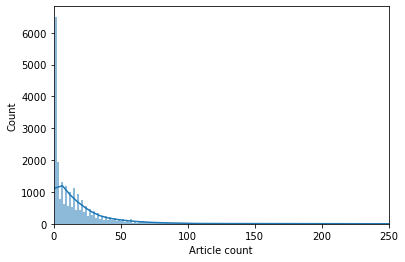

In [51]:
sns.histplot(df_invoice['Article count'], kde=True, linewidth=0)
plt.xlim(0, 250)

In [52]:
df_invoice.describe()

,Revenue,Article count
count,24925.000000,24925.000000
mean,390.489117,21.626560
std,2007.098975,43.568572
min,-168469.600000,1.000000
25%,32.070000,2.000000
50%,218.940000,11.000000
75%,413.680000,24.000000
max,168469.600000,1112.000000


In [53]:
# save df_invoice (invoice counts)
df_invoice.to_csv('ecommerce_invoice_article_count.csv', sep='\t')

In [148]:
# find article with 0 Revenue
df_article_revenue = dfc.groupby(['StockCode']).agg({'Revenue': 'sum'})

In [149]:
df_article_revenue_0 = df_article_revenue[df_article_revenue['Revenue'] == 0]

In [150]:
df_article_revenue_0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 21655 to 79323B
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Revenue  5 non-null      float64
dtypes: float64(1)
memory usage: 80.0+ bytes


In [162]:
article_revenue_0 = df_article_revenue_0.index.tolist()

In [176]:
article_revenue_0_description = []
for a in article_revenue_0:
    article = dfc['Description'][dfc['StockCode'] == a].unique()
    article_revenue_0_description.append(article[0])
    
print('There are', len(article_revenue_0_description), 'Article without any revenue:', article_revenue_0_description[:])

There are 5 Article without any revenue: ['hanging ridge glass t-light holder', 'glass cake cover and plate', 'travel card wallet dotcomgiftshop', 'paper craft , little birdie', 'black cherry lights']


# Analyzing Products and Product Categorys

- most and less frequent products
- saisonality of most frequent products
- **lemmatization and clustering of the product description to build categorys**
- most and less frequent categorys
- saisonality of most frequent categorys: weekday, month
- Canceled Orders: most recent products/groups

### Categorizing Products - lemmatization and clustering of the product description to build categorys

In [54]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
#nltk.download('stopwords')

In [55]:
# make Description lower case - so that it can be used for further processing
dfc['Description'] = dfc['Description'].str.lower()

In [56]:
# define stopwords
st_words = stopwords.words('english')
dfc['Description_nostop'] = dfc['Description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (st_words)]))

In [57]:
# lemmatizing 'Description'

lemmatizer = WordNetLemmatizer()

def lemmatizing(token):
    words = []
    for word in token:
        word_lemmatized = lemmatizer.lemmatize(word)
        words.append(word_lemmatized)
    return words
    
dfc['Description_tokenized'] = dfc['Description_nostop'].apply(word_tokenize)
dfc['Description_lemmatized'] = dfc['Description_tokenized'].apply(lambda x: lemmatizing(x))


In [58]:
dfc.sample(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Revenue,Description_nostop,Description_tokenized,Description_lemmatized
206540,554942,21381,mini wooden happy birthday garland,2,2019-05-25 14:01:00,1.69,17841,3.38,mini wooden happy birthday garland,"[mini, wooden, happy, birthday, garland]","[mini, wooden, happy, birthday, garland]"
186957,552894,21944,kittens design flannel,1,2019-05-10 10:53:00,0.85,14606,0.85,kittens design flannel,"[kittens, design, flannel]","[kitten, design, flannel]"
278670,561217,23229,vintage donkey tail game,1,2019-07-23 17:09:00,7.46,0,7.46,vintage donkey tail game,"[vintage, donkey, tail, game]","[vintage, donkey, tail, game]"


In [59]:
(dfc['Description_lemmatized'] == dfc['Description_tokenized']).nunique()

2

#### Count most common words

In [60]:
from collections import Counter

top_words_all = []
top_words = []

def word_from_list(lem_list):
    for word in lem_list:
        top_words_all.append(word)
        
dfc['Description_lemmatized'].apply(lambda x: word_from_list(x))

# keep only words with more than 2 signs (delte single numbers, in ...)
for t in top_words_all:
    if len(t) > 2:
        top_words.append(t)
        
    

In [61]:
print(len(top_words_all))
print(len(top_words))

2277145
2151531


In [62]:
#Counter(top_words).most_common(200)
len(Counter(top_words).most_common())

1962

In [63]:
Counter(top_words).most_common(10)

[('set', 54662),
 ('bag', 52219),
 ('heart', 44265),
 ('red', 43427),
 ('retrospot', 35146),
 ('vintage', 33803),
 ('design', 30663),
 ('pink', 30112),
 ('box', 27767),
 ('christmas', 25200)]

### Clustering Categorys

In [64]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.cluster import KMeans

In [65]:
#dfc['Description_vectorizing'] = dfc['Description_lemmatized'].apply(lambda x: ' '.join([word for word in x]))
#
#Vector = TfidfVectorizer()
#X = Vector.fit_transform(dfc['Description_vectorizing'])
#
## Sum of squared distances
#ssd = []
#K = range(1, 10)
#for k in K:
#    km = KMeans(n_clusters = k)
#    km = km.fit(X)
#    ssd.append(km.inertia_)

In [66]:
## Plot sum of squared distances to evaluate elbow method
#plt.figure(figsize=(12, 8))
#plt.plot(K, ssd, 'ro-')
#plt.xlabel('k')
#plt.ylabel('Sum of squared distances')
#plt.title('Optimal k (elbow)')
#plt.show()

### here a picture of running the code above (very long runtime)

![Image](optimal_k_elbow.png)

In [68]:
from wordcloud import WordCloud

In [69]:
## the optimal number of clusters = 3 or 6
## Create and fit the model
#
#kmeans = KMeans(n_clusters = 6)
#model = kmeans.fit(X)
#
#exp = model.labels_
#dfc['Cluster'] = exp
#
#dfc_products = dfc[['Description', 'Description_nostop', 'Cluster' ]]
#
#fig = plt.figure(figsize = (22, 17))
#for c in range(len(dfc['Cluster'].unique())):
#    ax = fig.add_subplot(3,2,c+1)
#    ax.set_title('Cluster %d'%c)
#    cluster = dfc_products[dfc_products.Cluster == c]
#    wordcloud = WordCloud(max_words=2500, margin=0).generate(' '.join(cluster['Description_nostop']))
#    ax.imshow(wordcloud)
#    ax.axis("off")

# export dfc
#dfc.to_csv('ecommerce_dataset_us_clustered_6.csv', sep='\t')

### here a picture of running the code above (very long runtime)

![Picture](wordcloud_6_cluster.png)

### allocation of the categories

In [70]:
# import of processed df and cleaning (drop columns, name categories)
df_categories = pd.read_csv('ecommerce_dataset_us_clustered_6.csv', sep='\t')
df_categories.head(1)

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Revenue,Description_nostop,Description_tokenized,Description_lemmatized,Description_vectorizing,Cluster
0,0,536365,85123A,white hanging heart t-light holder,6,2018-11-29 08:26:00,2.55,17850,15.3,white hanging heart t-light holder,"['white', 'hanging', 'heart', 't-light', 'hold...","['white', 'hanging', 'heart', 't-light', 'hold...",white hanging heart t-light holder,2


In [71]:
category_dict = {0: 'kitchen', 1: 'christmas', 2: 'decoration', 3: 'retrospot', 4: 'bag', 5: 'sign'}
df_categories['Category'] = df_categories['Cluster']
df_categories = df_categories.replace({'Category': category_dict})

In [72]:
df_categories.head(1)

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Revenue,Description_nostop,Description_tokenized,Description_lemmatized,Description_vectorizing,Cluster,Category
0,0,536365,85123A,white hanging heart t-light holder,6,2018-11-29 08:26:00,2.55,17850,15.3,white hanging heart t-light holder,"['white', 'hanging', 'heart', 't-light', 'hold...","['white', 'hanging', 'heart', 't-light', 'hold...",white hanging heart t-light holder,2,decoration


In [73]:
# clean df (without unnecessary columns from clustering)
df_categories = df_categories[['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', \
       'UnitPrice', 'CustomerID', 'Revenue', 'Cluster', 'Category']]
# correct dtypes
df_categories['CustomerID'] = df_categories['CustomerID'].astype('object')
df_categories['InvoiceDate'] = pd.to_datetime(df_categories['InvoiceDate'])

In [74]:
# export df_categories
#df_categories.to_csv('ecommerce_dataset_us_clustered_6_clean.csv', sep='\t')

# Customer Segmentation

- form an RFM group

In [75]:
import squarify
from datetime import timedelta

In [76]:
df = pd.read_csv('ecommerce_dataset_us_clustered_6_clean.csv', sep='\t')
# correct dtypes
df['CustomerID'] = df['CustomerID'].astype('object')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [77]:
# drop CustomerID == 0 (all data without any CustomerID)
df = df[df['CustomerID'] != 0]

In [78]:
df.head(3)

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Revenue,Cluster,Category
0,0,536365,85123A,white hanging heart t-light holder,6,2018-11-29 08:26:00,2.55,17850,15.30,2,decoration
1,1,536365,71053,white metal lantern,6,2018-11-29 08:26:00,3.39,17850,20.34,5,sign
2,2,536365,84406B,cream cupid hearts coat hanger,8,2018-11-29 08:26:00,2.75,17850,22.00,2,decoration


In [79]:
df['InvoiceDate'].max()

Timestamp('2019-12-07 12:50:00')

### group by CustomerID, count Invoices for Frequency, count total Revenue for Monetary, create snapshot Date for calculating Recency

In [80]:
# snapshot Date
snapshot_date = df['InvoiceDate'].max() + timedelta(days=1)

In [81]:
# snapshot date = 1 day after last day in data set
snapshot_date = df['InvoiceDate'].max() + timedelta(days=1)

# grouping by CustomerID
data_process = df.groupby(['CustomerID']).agg({'InvoiceDate': lambda x: (snapshot_date - x.max()).days,\
                                              'InvoiceNo': 'count',\
                                              'Revenue': 'sum'})

# rename columns
data_process.rename(columns={'InvoiceDate': 'Recency',\
                            'InvoiceNo': 'Frequency',\
                            'Revenue': 'MonetaryValue'}, inplace=True)

In [82]:
data_process.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346,326,2,0.00
12347,2,182,4310.00
12348,75,27,1437.24
12349,19,72,1457.55
12350,310,16,294.40


In [83]:
data_process.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4372 entries, 12346 to 18287
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Recency        4372 non-null   int64  
 1   Frequency      4372 non-null   int64  
 2   MonetaryValue  4372 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 136.6 KB


In [84]:
data_process.describe()

,Recency,Frequency,MonetaryValue
count,4372.000000,4372.000000,4372.000000
mean,92.150046,92.767383,1882.254721
std,100.825410,232.172507,8204.943841
min,1.000000,1.000000,-4287.630000
25%,17.000000,17.000000,292.240000
50%,50.000000,41.500000,642.805000
75%,143.000000,101.000000,1592.090000
max,374.000000,7983.000000,278466.020000


#### Plot of RFM distributions

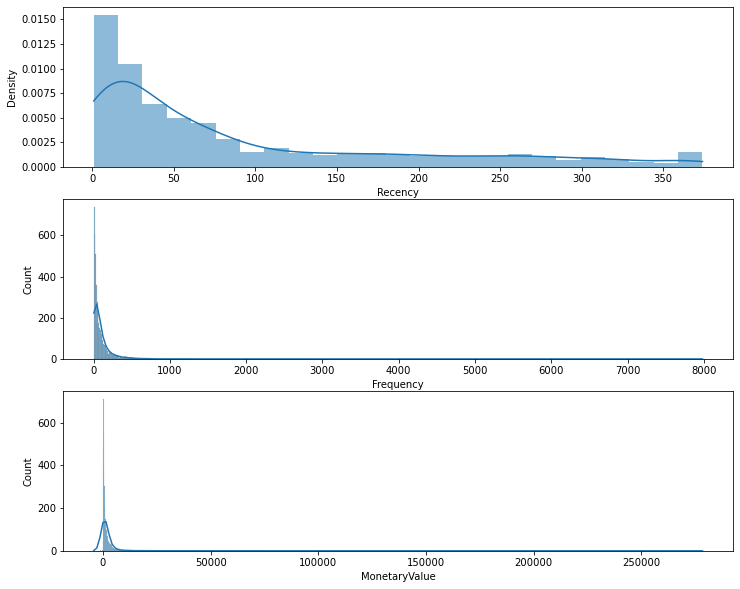

In [85]:
plt.figure(figsize=(12, 10))

# Recency distribution
plt.subplot(3, 1, 1)
sns.histplot(data_process['Recency'], kde=True, stat='density', linewidth=0)

# Frequency distribution
plt.subplot(3, 1, 2)
sns.histplot(data_process['Frequency'], kde=True)


# Monetary distribution
plt.subplot(3, 1, 3)
sns.histplot(data_process['MonetaryValue'], kde=True)

plt.show()

In [86]:
data_process[data_process['MonetaryValue'] == data_process['MonetaryValue'].max()]

,Recency,Frequency,MonetaryValue
CustomerID,,,
14646,2,2068,278466.02


### Create new R, F, M Columns - Calculate theire quantiles

In [87]:
# create Labels for Recency and Frequency
r_labels = range(4, 0, -1)
f_labels = range(1, 5)
m_labels = range(1, 5)

# assign labels to 4 equal percentile groups for Recency and Frequency
r_groups = pd.qcut(data_process['Recency'], q=4, labels=r_labels)
f_groups = pd.qcut(data_process['Frequency'], q=4, labels=f_labels)
m_groups = pd.qcut(data_process['MonetaryValue'], q=4, labels=m_labels)

# create new Columns
data_process = data_process.assign(R = r_groups.values, F = f_groups.values, M = m_groups.values)

### Calculate RFM_Score

In [88]:
# sum R, F, M values
data_process['RFM_Score'] = data_process[['R', 'F', 'M']].sum(axis=1)

In [89]:
data_process.sample(5)

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score
CustomerID,,,,,,,
15574,178,168,702.25,1,4,3,8
13113,1,280,10510.00,4,4,4,12
17600,18,13,161.67,3,1,1,5
17886,32,109,899.61,3,4,3,10
13008,323,15,178.47,1,1,1,3


In [90]:
data_process['RFM_Score'].unique()

array([ 3, 12,  7,  9,  4, 10, 11,  8,  6,  5], dtype=int64)

### Define Customer Levels

In [91]:
# group rfm_score into levels
def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'Premium'
    elif df['RFM_Score'] >= 5:
        return 'Common'
    else:
        return 'Rarely'

    # create new RFM_Levelcolumn    
data_process['RFM_Level'] = data_process.apply(rfm_level, axis=1)

In [92]:
data_process.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score,RFM_Level
CustomerID,,,,,,,,
12346,326,2,0.00,1,1,1,3,Rarely
12347,2,182,4310.00,4,4,4,12,Premium
12348,75,27,1437.24,2,2,3,7,Common
12349,19,72,1457.55,3,3,3,9,Premium
12350,310,16,294.40,1,1,2,4,Rarely


In [93]:
df_rfm = data_process[['Recency', 'Frequency', 'MonetaryValue', 'RFM_Score', 'RFM_Level']]

In [94]:
# export df_rfm
#df_rfm.to_csv('ecommerce_dataset_us_Customer_RFM.csv', sep='\t')